# Критерии Стьюдента

## Task 1
Уровень кальция в крови здоровых молодых женщин равен в среднем 9.5 милиграммам на децилитр и имеет характерное стандартное отклонение 0.4 мг/дл. В сельской больнице Гватемалы для 160 здоровых беременных женщин при первом обращении для ведения беременности был измерен уровень кальция; среднее значение составило 9.57 мг/дл. Можно ли утверждать, что средний уровень кальция в этой популяции отличается от 9.5?

Посчитайте достигаемый уровень значимости. Поскольку известны только среднее и дисперсия, а не сама выборка, нельзя использовать стандартные функции критериев — нужно реализовать формулу достигаемого уровня значимости самостоятельно.

Округлите ответ до четырёх знаков после десятичной точки.

In [1]:
from scipy import stats

In [2]:
mean, mu_0, sigma, n = 9.57, 9.5, 0.4, 160
z = (mean - mu_0)/(sigma/n**0.5)
p_value = 2*(1 - stats.norm.cdf(abs(z)))
round(p_value, 4)

0.0269

## Task 2
Имеются данные о стоимости и размерах 53940 бриллиантов.

Отделите 25% случайных наблюдений в тестовую выборку с помощью функции sklearn.cross_validation.train_test_split (зафиксируйте random state = 1). На обучающей выборке настройте две регрессионные модели:

1. линейную регрессию с помощью LinearRegression без параметров
2. случайный лес с помощью RandomForestRegressor с random_state=1.

Какая из моделей лучше предсказывает цену бриллиантов? Сделайте предсказания на тестовой выборке, посчитайте модули отклонений предсказаний от истинных цен. Проверьте гипотезу об одинаковом среднем качестве предсказаний, вычислите достигаемый уровень значимости. Отвергается ли гипотеза об одинаковом качестве моделей против двусторонней альтернативы на уровне значимости $\alpha=0.05$?

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

/usr/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
data = pd.read_csv('datasets/diamonds.txt', sep='\t')
data.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [5]:
data.shape

(53940, 7)

In [6]:
X = data.drop('price', axis=1)
y = data['price']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [8]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
rf_regressor = RandomForestRegressor(random_state=1)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [10]:
lin_reg_predictions = linear_regressor.predict(X_test)
rf_predictions = rf_regressor.predict(X_test)

In [11]:
mean_absolute_error(y_test, lin_reg_predictions)

890.3764004285592

In [12]:
mean_absolute_error(y_test, rf_predictions)

803.6143383081302

In [13]:
lin_reg_dev = abs(y_test - lin_reg_predictions)
rf_dev = abs(y_test - rf_predictions)

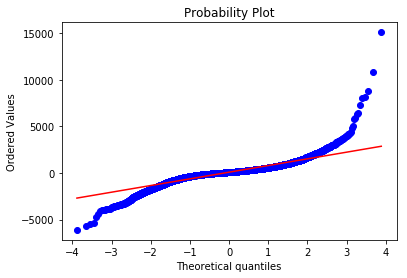

In [14]:
%matplotlib inline
from matplotlib import pylab
stats.probplot(lin_reg_dev - rf_dev, dist = "norm", plot = pylab)
pylab.show()

In [15]:
stats.ttest_rel(lin_reg_dev, rf_dev)

Ttest_relResult(statistic=12.930817614948603, pvalue=5.074175575671402e-38)

## Task 3
В предыдущей задаче посчитайте 95% доверительный интервал для разности средних абсолютных ошибок предсказаний регрессии и случайного леса. Чему равна его ближайшая к нулю граница? Округлите до десятков (поскольку случайный лес может давать немного разные предсказания в зависимости от версий библиотек, мы просим вас так сильно округлить, чтобы полученное значение наверняка совпало с нашим).

In [16]:
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans
left, right = DescrStatsW(lin_reg_dev - rf_dev).tconfint_mean()
round(left, -1)

70.0